# 前言

基于CMS实验Full RunII的矢量玻色子散射的Z $\gamma$ 过程（**V**ector **B**oson **S**cattering (**VBS**) Z $\gamma$）的分析：[arxiv:2106.11082](https://arxiv.org/abs/2106.11082), 用四个章节进行了一个简化版的重复分析。会用到2016年和2017年的数据和模拟样本。


# 第一章 本底估计之 fake photon（nonprompt photon）估计

In [1]:
import ROOT

Welcome to JupyROOT 6.24/06


## Exercise 1 - Plot Scan

In [2]:
fdir='/data/pubfs/pku_visitor/public_write/zajj_ori/'

In [3]:
fZA_EWK=ROOT.TFile(fdir+'cutla-outZA-EWK17.root')
tree1=fZA_EWK.Get('ZPKUCandidates')

28338

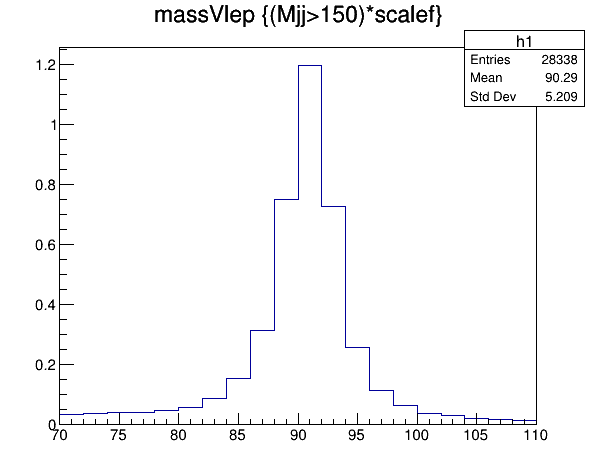

In [4]:
c1=ROOT.TCanvas('c1','',600,500)
c1.Draw()
tree1.Draw('massVlep>>h1(20,70,110)','(Mjj>150)*scalef','HIST')

28338

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


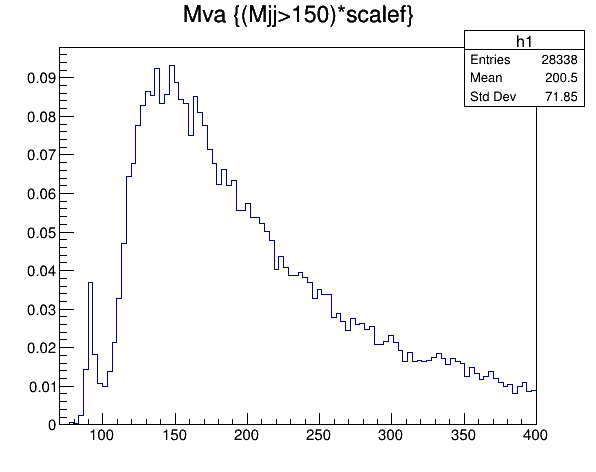

In [5]:
c1=ROOT.TCanvas('c1','',600,500)
c1.Draw()
tree1.Draw('Mva>>h1(100,70,400)','(Mjj>150)*scalef','HIST')

28338

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


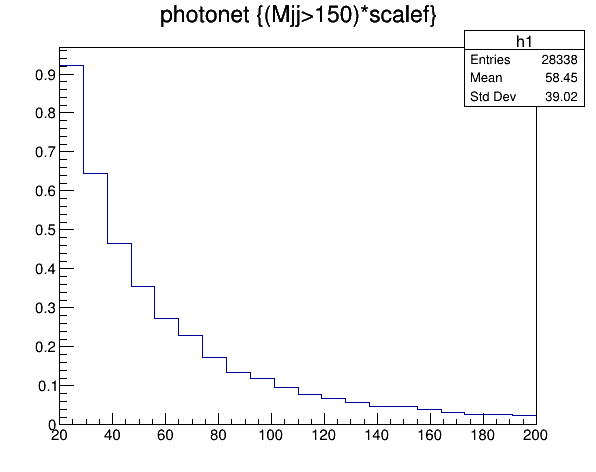

In [6]:
c1=ROOT.TCanvas('c1','',600,500)
c1.Draw()
tree1.Draw('photonet>>h1(20,20,200)','(Mjj>150)*scalef','HIST')

28338

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


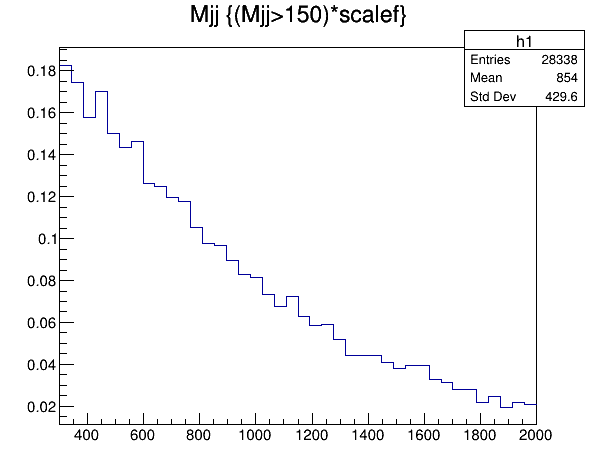

In [7]:
c1=ROOT.TCanvas('c1','',600,500)
c1.Draw()
tree1.Draw('Mjj>>h1(40,300,2000)','(Mjj>150)*scalef','HIST')

28338

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


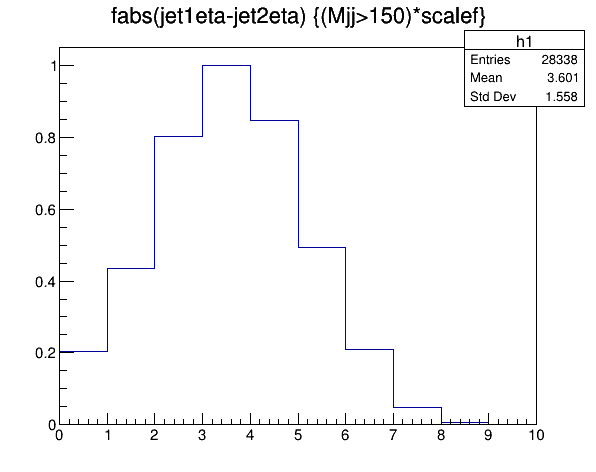

In [8]:
c1=ROOT.TCanvas('c1','',600,500)
c1.Draw()
tree1.Draw('fabs(jet1eta-jet2eta)>>h1(10,0,10)','(Mjj>150)*scalef','HIST')

73418

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


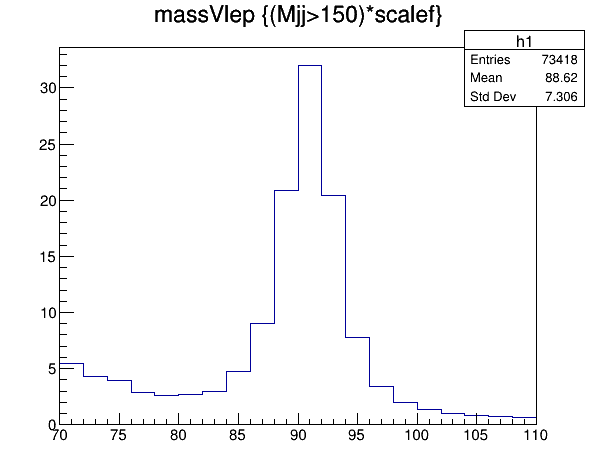

In [9]:
fZA=ROOT.TFile(fdir+'cutla-outZA17.root')
tree2=fZA.Get('ZPKUCandidates')
c1=ROOT.TCanvas('c1','',600,500)
c1.Draw()
tree2.Draw('massVlep>>h1(20,70,110)','(Mjj>150)*scalef','HIST')

## Exercise2

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


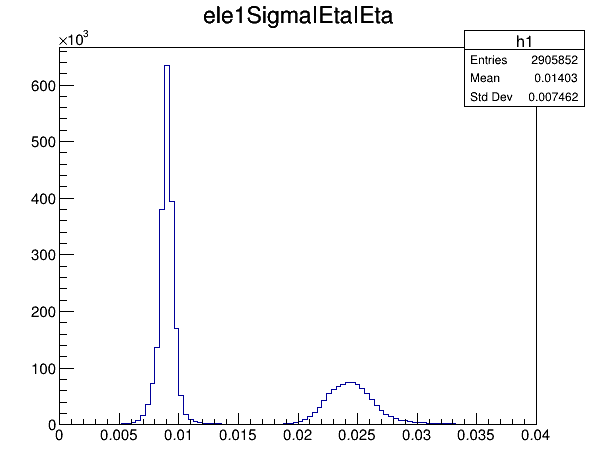

In [10]:
fdy=ROOT.TFile(fdir+'dyJets_94X_massTreeV2.root')
tree3=fdy.Get('EventMassTree')
c1=ROOT.TCanvas('c1','',600,500)
c1.Draw()
tree3.Draw('ele1SigmaIEtaIEta>>h1(100,0,0.04)')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


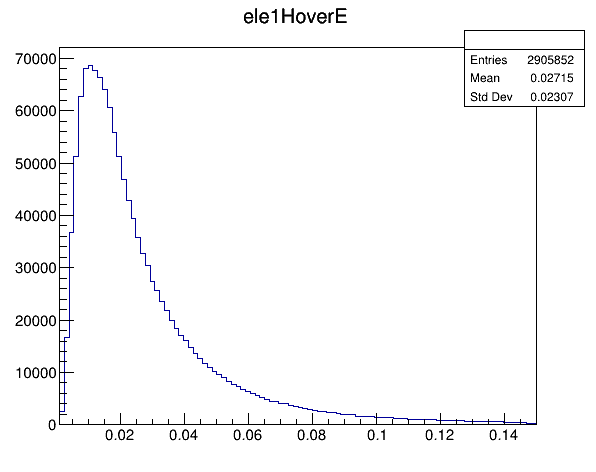

In [11]:
c1=ROOT.TCanvas('c1','',600,500)
c1.Draw()
tree3.Draw('ele1HoverE>>(100,0.001,0.15)')

## Exercise 3

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


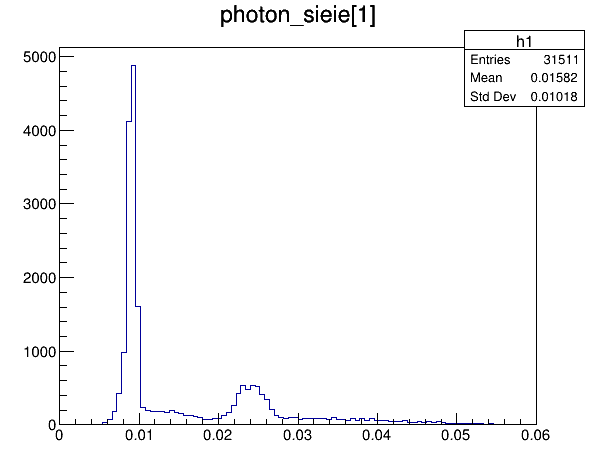

In [12]:
c1=ROOT.TCanvas('c1','',600,500)
c1.Draw()
tree1.Draw('photon_sieie[1]>>h1(100,0,0.06)')


10714

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


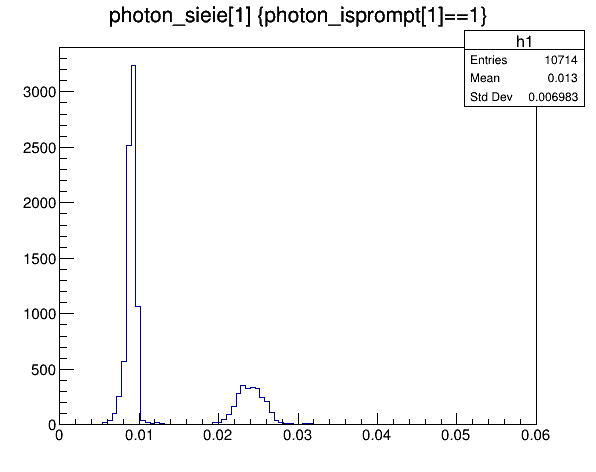

In [13]:
c1=ROOT.TCanvas('c1','',600,500)
c1.Draw()
tree1.Draw('photon_sieie[1]>>h1(100,0,0.06)','photon_isprompt[1]==1')

In [14]:
fZjets=ROOT.TFile.Open(fdir+'cutla-outDYJets18.root')
tree4=fZjets.Get('Events')
hist1=ROOT.TH1D('hist1','',10,20,200)
hist2=ROOT.TH1D('hist2','',10,20,200)

tree4.Draw("photonet>>hist1","(photon_selection==1 || photon_selection==4 || photon_selection==5 ) && photon_isprompt!=1 && photonchiso*photonet>4 && photonchiso*photonet<10")
tree4.Draw("photonet>>hist2","(photon_selection==1 || photon_selection==4 || photon_selection==5 ) && photon_isprompt!=1")


468

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


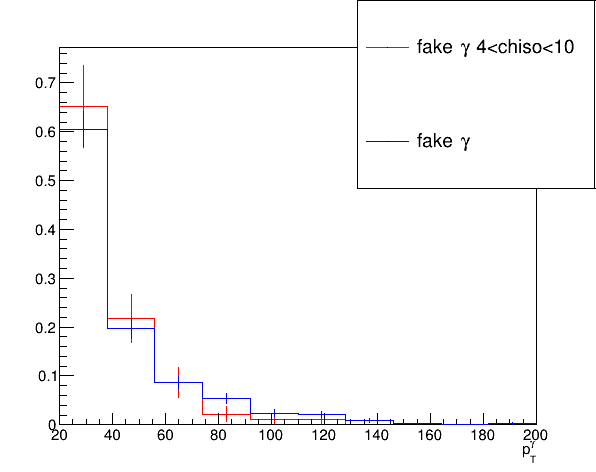

In [15]:
c1=ROOT.TCanvas('c1','',600,500)
leg=ROOT.TLegend(0.6,0.6,1.0,1.0)
c1.Draw()
hist1.SetLineColor(2)
hist2.SetLineColor(4)
hist1.GetXaxis().SetTitle('p_{T}^{#gamma}')
leg.AddEntry(hist1,'fake #gamma 4<chiso<10')
leg.AddEntry(hist2,'fake #gamma')
hist1.DrawNormalized('HIST E')
hist2.DrawNormalized('HIST SAME E')
leg.Draw()

## Exercise3

In [16]:
fdir='/data/pubfs/pku_visitor/public_write/fakephoton_hist/'

In [17]:
fake = ROOT.TFile.Open(fdir+'Fake_template-DMuon18.root')

In [18]:
true = ROOT.TFile.Open(fdir+'True_template-ZA18.root')

In [19]:
data = ROOT.TFile.Open(fdir+'Data_template-DMuon18.root')

In [20]:
nBins=9
sieie_bin=3
bins=[]
for i in range(0,nBins+1):
     bins.append(0.00515+0.0025*2/3*i)

In [21]:
import numpy as np
def fit(lowpt,highpt):
    hdata_= data.Get("h3_pt{}_{}".format(lowpt,highpt))
    hfake_= fake.Get("h2_pt{}_{}".format(lowpt,highpt))
    htrue_= true.Get("h1_pt{}_{}".format(lowpt,highpt))
    
    hdata=hdata_.Rebin(nBins,'hdata',np.array(bins))
    hfake=hfake_.Rebin(nBins,'hfake',np.array(bins))
    htrue=htrue_.Rebin(nBins,'htrue',np.array(bins))
    
    nData=hdata.GetSum()
    sieie=ROOT.RooRealVar("sieie", "sieie", 0.00515, 0.02015)
    data_hist=ROOT.RooDataHist('datahist','datahist',sieie,hdata)
    true_hist=ROOT.RooDataHist('truehist','truehist',sieie,htrue)
    fake_hist=ROOT.RooDataHist('fakehist','fakehist',sieie,hfake)

    true_pdf=ROOT.RooHistPdf("truepdf", "truepdf", sieie, true_hist)
    fake_pdf=ROOT.RooHistPdf("fakepdf", "fakepdf", sieie, fake_hist)

    nFake=ROOT.RooRealVar("fake number", "fake number",0, nData)
    nTrue=ROOT.RooRealVar("true number", "true number",0, nData)

    etrue_pdf=ROOT.RooExtendPdf("ntrue", "ntrue", true_pdf, nTrue)
    efake_pdf=ROOT.RooExtendPdf("nfake", "nfake", fake_pdf, nFake);

    fullpdf=ROOT.RooAddPdf("full_pdf", "true_plus_fake", ROOT.RooArgList(etrue_pdf,efake_pdf))
    
    fullpdf.fitTo(data_hist,ROOT.RooFit.SumW2Error(ROOT.kFALSE), ROOT.RooFit.Extended(ROOT.kTRUE));
    
    xframe=sieie.frame(ROOT.RooFit.Title(str(lowpt)+'<pt<'+str(highpt)),ROOT.RooFit.Bins(nBins))
    data_hist.plotOn(xframe)
    fullpdf.plotOn(xframe, ROOT.RooFit.Name("sum"), ROOT.RooFit.LineColor(ROOT.kRed));
    fullpdf.plotOn(xframe, ROOT.RooFit.Components("ntrue"), ROOT.RooFit.Name("true"),ROOT.RooFit.LineColor(ROOT.kGreen), ROOT.RooFit.LineStyle(9));
    fullpdf.plotOn(xframe, ROOT.RooFit.Components("nfake"), ROOT.RooFit.Name("fake"),ROOT.RooFit.LineColor(ROOT.kBlue), ROOT.RooFit.LineStyle(9));

    sieie.setRange('window',0.00515,0.01015)
    fracFake=efake_pdf.createIntegral(sieie,sieie,"window")
    nFake_fit = nFake.getVal()
    nFake_inwindow = nFake_fit*fracFake.getVal()
    nDataInWindow = hdata.Integral(1,sieie_bin)
    fakerate = nFake_inwindow/nDataInWindow
    strFR='FR= %0.3f' %(fakerate)

    chi2=ROOT.RooChi2Var("chi2", "chi2", fullpdf, data_hist)
    chi2ToNDF = chi2.getVal() / (nBins - 2);
    strChi2 = '#chi^{2}/ndf=%0.2f' %(chi2ToNDF)
    
    strLatex=strFR+', '+strChi2
    
    hdata.SetLineColor(ROOT.kRed)
    hfake.SetLineColor(ROOT.kBlue)
    htrue.SetLineColor(ROOT.kGreen)
    leg=ROOT.TLegend(0.55,0.6,0.9,0.9)
    leg.AddEntry(hdata,'Fit results','L')
    leg.AddEntry(htrue,'True photon','L')
    leg.AddEntry(hfake,'Fake photon','L')
    textFR=ROOT.TLatex(0.5,0.5,strLatex)
    c1=ROOT.TCanvas("c1", "c1", 500, 400)
    c1.Draw()
    xframe.Draw()
    leg.Draw()
    textFR.SetTextSize(0.05)
    textFR.SetNDC()
    textFR.Draw()

    print(strLatex)
    c1.Print('./pt'+str(lowpt)+'_'+str(highpt)+'.pdf')

In [22]:
fit(20,25)

FR= 0.436, #chi^{2}/ndf=19.20

RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt

[#1] INFO:DataHandling -- RooDataHist::adjustBinning(datahist): fit range of variable sieie expanded to nearest bin boundaries: [0.00515,0.02015] --> [0.00515,0.02015]
[#1] INFO:DataHandling -- RooDataHist::adjustBinning(truehist): fit range of variable sieie expanded to nearest bin boundaries: [0.00515,0.02015] --> [0.00515,0.02015]
[#1] INFO:DataHandling -- RooDataHist::adjustBinning(fakehist): fit range of variable sieie expanded to nearest bin boundaries: [0.00515,0.02015] --> [0.00515,0.02015]
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions have been identified as constant and will be precalculated and cached: (truepdf,f

Warning in <TH1D::Rebin>: Bin edge 2 of rebinned histogram does not match any bin edges of the old histogram. Result can be inconsistent
Warning in <TH1D::Rebin>: Bin edge 3 of rebinned histogram does not match any bin edges of the old histogram. Result can be inconsistent
Warning in <TH1D::Rebin>: Bin edge 5 of rebinned histogram does not match any bin edges of the old histogram. Result can be inconsistent
Warning in <TH1D::Rebin>: Bin edge 6 of rebinned histogram does not match any bin edges of the old histogram. Result can be inconsistent
Warning in <TH1D::Rebin>: Bin edge 8 of rebinned histogram does not match any bin edges of the old histogram. Result can be inconsistent
Warning in <TH1D::Rebin>: Bin edge 9 of rebinned histogram does not match any bin edges of the old histogram. Result can be inconsistent
Warning in <TH1D::Rebin>: Bin edge 2 of rebinned histogram does not match any bin edges of the old histogram. Result can be inconsistent
Warning in <TH1D::Rebin>: Bin edge 3 of r

In [23]:
fit(25,30)

FR= 0.376, #chi^{2}/ndf=8.99
[#1] INFO:DataHandling -- RooDataHist::adjustBinning(datahist): fit range of variable sieie expanded to nearest bin boundaries: [0.00515,0.02015] --> [0.00515,0.02015]
[#1] INFO:DataHandling -- RooDataHist::adjustBinning(truehist): fit range of variable sieie expanded to nearest bin boundaries: [0.00515,0.02015] --> [0.00515,0.02015]
[#1] INFO:DataHandling -- RooDataHist::adjustBinning(fakehist): fit range of variable sieie expanded to nearest bin boundaries: [0.00515,0.02015] --> [0.00515,0.02015]
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions have been identified as constant and will be precalculated and cached: (truepdf,fakepdf)
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (ntrue,nfake)
 **********
 **   10 **SET PRINT           1
 **********
 **********
 **   11 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.  

Warning in <TH1D::Rebin>: Bin edge 2 of rebinned histogram does not match any bin edges of the old histogram. Result can be inconsistent
Warning in <TH1D::Rebin>: Bin edge 3 of rebinned histogram does not match any bin edges of the old histogram. Result can be inconsistent
Warning in <TH1D::Rebin>: Bin edge 5 of rebinned histogram does not match any bin edges of the old histogram. Result can be inconsistent
Warning in <TH1D::Rebin>: Bin edge 6 of rebinned histogram does not match any bin edges of the old histogram. Result can be inconsistent
Warning in <TH1D::Rebin>: Bin edge 8 of rebinned histogram does not match any bin edges of the old histogram. Result can be inconsistent
Warning in <TH1D::Rebin>: Bin edge 9 of rebinned histogram does not match any bin edges of the old histogram. Result can be inconsistent
Warning in <TH1D::Rebin>: Bin edge 2 of rebinned histogram does not match any bin edges of the old histogram. Result can be inconsistent
Warning in <TH1D::Rebin>: Bin edge 3 of r

## Exercise 4

In [24]:
hist=[]
for i in range(0,9):
    h1=ROOT.TH1D('hist_{}'.format(i),'',20,500,2000)
    
    tree2.Draw('Mjj>>hist_{}'.format(i),'(Mjj>500)*pweight['+str(i)+']','HIST')
    hist.append(h1)

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


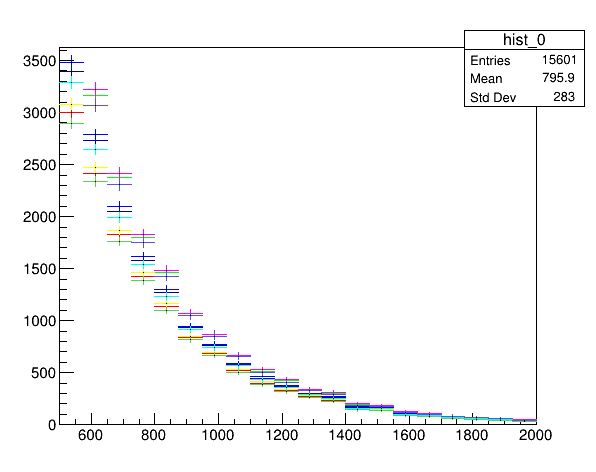

In [25]:
c1=ROOT.TCanvas('c1','',600,500)
c1.Draw()
hist[0].Draw()
for i in range(1,9):
    hist[i].SetLineColor(i+1)
    hist[i].Draw('same')

The uncertainty in every bin can be calculated.